<a href="https://colab.research.google.com/github/pujangrg1/pujan_INFO5731_Spring2020/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

In [ ]:
# Write your code here

!pip install selenium
!pip install beautifulsoup4
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys, time
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import selenium
#webdriver is our tool to interact with the webpage
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


import requests #needed to load the page for BS4
from bs4 import BeautifulSoup
import pandas as pd #Using panda to create our dataframe

  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu b

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.imdb.com/title/tt9376612/reviews")
try:
  count = 4500
  while(count>0):
    wd.find_element_by_id("load-more-trigger").click()
    wd.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    time.sleep(1)
    new_height = wd.execute_script('return document.body.scrollHeight')
    prev_height = new_height
    count-=1
except Exception:
  pass

page = wd.page_source
soup = BeautifulSoup(page, "html.parser")

#Get the title of the movie
all = soup.find(id="main")
parent = all.find(class_ ="parent")
name = parent.find(itemprop = "name")
url = name.find(itemprop = 'url')
film_title = url.get_text()

#Get the title of the review
title = [t.get_text().replace("\n", "") for t in all.select(".title")]

#Get the user name of the review
username = [n.find('a').text for n in all.select(".display-name-date .display-name-link")]

#Get the review
review = [r.get_text() for r in all.select(".content .text")]

#Get the review data
date = [d.get_text() for d in all.select(".display-name-date .review-date")]

#Make it into dataframe
table_review = pd.DataFrame({
  "UserName": username,
  "Title" : title,
  "Review" : review,
  "Date": date
})

table_review.to_csv('reviews.csv', index=False)

table_review

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


,UserName,Title,Review,Date
0,daisukereds,Sort of disappointed..,I got to admit I wasn't particularly blown awa...,16 September 2021
1,educallejero,Questionable script (and Awkwafina is just th...,The characters are a bit incoherent and straig...,14 September 2021
2,BA_Harrison,"Crouching Tiger, Hidden Superhero.",Martial arts meets the MCU in Shang-Chi and th...,27 February 2022
3,topdog-64841,Surprisingly good,I'll be honest - Marvel movies are not in my t...,28 November 2021
4,brookenichole-98054,Could've been great,Shang-Chi is a boring film. The characters wer...,14 November 2021
...,...,...,...,...
2402,einarrenne,Childish and wierd for a Marvels movie,"This movie was way to childish and silly, its ...",20 November 2021
2403,aming-09464,Not as good as it could,Shang-Chi and the Legend of Ten Rings and a Dr...,26 January 2022
2404,ashleypurdyfan,Shang-Chi,I absolutely love this movie I didn't get to s...,8 April 2022
2405,saharob,Boring and Snoozing,All the events were totally predictable. I cou...,17 November 2021


# **Downloading and Installing required modules**

**Installing nltk and stopwords**

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Installing java**

In [4]:
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()

openjdk version "11.0.14.1" 2022-02-08
OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [5]:
!pip install pyLDAvis

In [6]:
!pip install --upgrade gensim

In [7]:
# You code here (Please add comments in the code):
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup

In [8]:
import spacy.cli
spacy.cli.download("en")

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

m# Run in python console
import nltk; nltk.download('stopwords')

In [9]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [10]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [11]:
data_words = table_review.Review.tolist()
data_words

['I got to admit I wasn\'t particularly blown away by anything in the movie.. I might even say "I was bored" by it.Don\'t get me wrong.. it IS a spectacle! The action is great. The locations are nice, costume design, sound design, etc. But it is overall a soft release not worth seeing in theaters.. specially as a follow-up to what Endgame was.The biggest problem for me, is how the underwritten lead has muddled personality (for reasons covered in the story) devoid of charm, personality or good dialogue.The next issue is the humor, which didn\'t land for me.. Not once. The supporting lead Awkwafina isn\'t her normal "loud" self that\'s supposed to be funny every time she opens her mouth. Her role is very supportive and a little dramatic. And while I questioned myself why was she even there for, it doesn\'t ultimately matter. She is another forgettable character that is given more importance than the role deserves.Finally, the third act is weak. There\'s a balancing problem with stakes. Y

In [12]:
#Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [13]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized)

[['get', 'admit', 'particularly', 'blow', 'movie', 'may', 'even', 'say', 'bored', 'get', 'wrong', 'spectacle', 'action', 'great', 'location', 'nice', 'costume', 'design', 'sound', 'design', 'overall', 'soft', 'release', 'worth', 'see', 'theater', 'specially', 'follow', 'big', 'problem', 'underwrite', 'lead', 'muddle', 'personality', 'reason', 'cover', 'story', 'devoid', 'charm', 'personality', 'good', 'dialogue', 'next', 'issue', 'humor', 'land', 'support', 'lead', 'normal', 'loud', 'self', 'suppose', 'funny', 'time', 'open', 'mouth', 'role', 'supportive', 'little', 'dramatic', 'question', 'even', 'ultimately', 'matter', 'forgettable', 'character', 'give', 'importance', 'role', 'deserve', 'finally', 'third', 'act', 'weak', 'balancing', 'problem', 'stake', 'feel', 'tension', 'weight', 'action', 'lot', 'superficial', 'end', 'feel', 'safe', 'plot', 'write', 'way', 'appeal', 'consider', 'portray', 'end', 'appeal', 'specific', 'certainly', 'feel', 'movie', 'bind', 'introduce', 'different', 

In [15]:
#Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 4), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)]]


In [16]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('act', 1),
  ('action', 2),
  ('admit', 1),
  ('also', 1),
  ('appeal', 2),
  ('aspect', 1),
  ('balancing', 1),
  ('big', 1),
  ('bind', 1),
  ('blow', 1),
  ('book', 1),
  ('bored', 1),
  ('certainly', 1),
  ('character', 1),
  ('charm', 1),
  ('comic', 1),
  ('consider', 1),
  ('costume', 1),
  ('cover', 1),
  ('deserve', 1),
  ('design', 2),
  ('devoid', 1),
  ('dialogue', 1),
  ('different', 1),
  ('dramatic', 1),
  ('end', 2),
  ('even', 2),
  ('feel', 4),
  ('finally', 1),
  ('follow', 1),
  ('forgettable', 1),
  ('funny', 1),
  ('generic', 1),
  ('get', 2),
  ('give', 1),
  ('good', 1),
  ('great', 1),
  ('humor', 1),
  ('importance', 1),
  ('introduce', 1),
  ('issue', 1),
  ('land', 1),
  ('lead', 2),
  ('little', 1),
  ('location', 1),
  ('lot', 1),
  ('loud', 1),
  ('matter', 1),
  ('may', 1),
  ('mouth', 1),
  ('movie', 2),
  ('muddle', 1),
  ('narrative', 1),
  ('next', 1),
  ('nice', 1),
  ('normal', 1),
  ('open', 1),
  ('overall', 1),
  ('particularly', 1),
  ('pers

In [17]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.069*"ring" + 0.036*"sister" + 0.028*"power" + 0.026*"year" + '
  '0.024*"father" + 0.023*"fighting" + 0.021*"event" + 0.019*"market" + '
  '0.018*"kill" + 0.018*"friend"'),
 (1,
  '0.049*"cry" + 0.022*"imo" + 0.000*"emotional" + 0.000*"montage" + '
  '0.000*"list" + 0.000*"devil" + 0.000*"afterlife" + 0.000*"spend" + '
  '0.000*"thank" + 0.000*"snyder"'),
 (2,
  '0.154*"perfect" + 0.087*"wonderful" + 0.030*"spot" + 0.013*"stream" + '
  '0.004*"saw" + 0.000*"adventure" + 0.000*"protagonist" + 0.000*"unnecessary" '
  '+ 0.000*"thank" + 0.000*"raise"'),
 (3,
  '0.045*"overly" + 0.043*"value" + 0.025*"dude" + 0.021*"belief" + '
  '0.020*"eat" + 0.014*"repetitive" + 0.010*"suicide" + 0.008*"squad" + '
  '0.000*"adventure" + 0.000*"protagonist"'),
 (4,
  '0.078*"serious" + 0.058*"rate" + 0.042*"director" + 0.037*"choreograph" + '
  '0.037*"heart" + 0.035*"graphic" + 0.035*"piece" + 0.026*"honest" + '
  '0.026*"genre" + 0.025*"regard"'),
 (5,
  '0.101*"buy" + 0.053*"horrible" + 0.03

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [19]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

**Create an LSA model using Gensim**

In [20]:
# Write your code here
lsamodel = LsiModel(corpus, 20, id2word)

**Determine the number of topics**

In [21]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

**Coherence score values**

In [22]:
start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values(id2word, corpus,data_lemmatized,stop, start, step)

In [23]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.3116
Num Topics: 8  - Coherence Value: 0.3143
Num Topics: 14  - Coherence Value: 0.3217
Num Topics: 20  - Coherence Value: 0.3136
Num Topics: 26  - Coherence Value: 0.3058
Num Topics: 32  - Coherence Value: 0.3202
Num Topics: 38  - Coherence Value: 0.3081
Num Topics: 44  - Coherence Value: 0.3206
Num Topics: 50  - Coherence Value: 0.3169
Num Topics: 56  - Coherence Value: 0.3218


**Print Topics**

In [24]:
pprint(lsamodel.print_topics())

[(0,
  '0.535*"movie" + 0.278*"film" + 0.232*"character" + 0.206*"good" + '
  '0.170*"scene" + 0.153*"fight" + 0.145*"make" + 0.143*"marvel" + '
  '0.142*"story" + 0.139*"see"'),
 (1,
  '0.684*"movie" + -0.623*"film" + -0.114*"also" + -0.114*"character" + '
  '-0.113*"ring" + -0.100*"well" + -0.064*"great" + -0.050*"action" + '
  '-0.047*"take" + 0.047*"watch"'),
 (2,
  '-0.512*"film" + 0.343*"ring" + -0.234*"movie" + 0.202*"fight" + 0.131*"go" '
  '+ 0.131*"get" + 0.123*"kill" + -0.120*"action" + 0.112*"village" + '
  '0.112*"year"'),
 (3,
  '-0.709*"good" + -0.337*"scene" + -0.247*"fight" + 0.214*"movie" + '
  '0.205*"character" + -0.191*"great" + 0.149*"well" + 0.140*"film" + '
  '0.089*"feel" + 0.086*"would"'),
 (4,
  '-0.477*"character" + -0.398*"really" + 0.322*"film" + 0.309*"ring" + '
  '0.205*"movie" + -0.194*"well" + -0.141*"feel" + -0.134*"great" + '
  '-0.119*"story" + 0.118*"fight"'),
 (5,
  '0.427*"story" + -0.375*"really" + -0.257*"scene" + 0.240*"marvel" + '
  '0.214*"g

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [25]:
nltk.download('all')
# Write your code here
!pip install preprocess
# import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [26]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [27]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(table_review.Review.tolist()):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [table_review.Review.tolist()[i].strip()[:35] for i in top]
    msg += ' has top words '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 I got to admit I wasn't particularl
Topic 1 I got to admit I wasn't particularl
Topic 2 I got to admit I wasn't particularl
Topic 3 I got to admit I wasn't particularl
Topic 4 I got to admit I wasn't particularl
Topic 5 I got to admit I wasn't particularl
Topic 6 I got to admit I wasn't particularl
Topic 7 I got to admit I wasn't particularl
Topic 8 I got to admit I wasn't particularl
Topic 9 I got to admit I wasn't particularl
Topic 10 I got to admit I wasn't particularl
Topic 11 I got to admit I wasn't particularl
Topic 12 I got to admit I wasn't particularl
Topic 13 I got to admit I wasn't particularl
Topic 14 I got to admit I wasn't particularl
Topic 15 I got to admit I wasn't particularl
Topic 16 I got to admit I wasn't particularl
Topic 17 I got to admit I wasn't particularl
Topic 18 I got to admit I wasn't particularl
Topic 19 I got to admit I wasn't particularl
Topic 20 I got to admit I wasn't particularl
Topic 21 I got to admit I wasn't particularl
Topic 22 I got to ad

<BarContainer object of 20 artists>

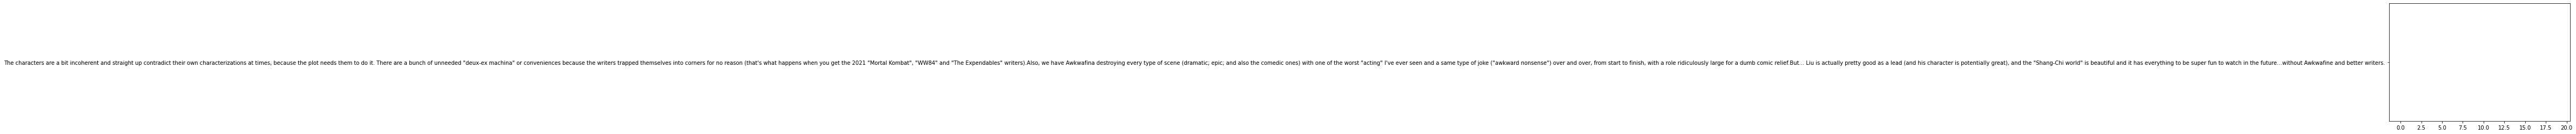

In [28]:
plt.bar(np.arange(20), table_review.Review.tolist()[1])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [29]:
# Write your code here

!pip install bertopic


  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.3 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [30]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(table_review.Review.tolist())

Batches:   0%|          | 0/76 [00:00<?, ?it/s]

2022-04-24 01:53:54,938 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-24 01:54:16,735 - BERTopic - Reduced dimensionality with UMAP
2022-04-24 01:54:16,903 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [31]:

freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,0,2382,0_the_and_of_to
1,1,25,1_the_to_and_katy


In [32]:

topic_model.get_topic(0)  # Select the most frequent topic

[('the', 0.13820593643631865),
 ('and', 0.0908601354826347),
 ('of', 0.07352855010679775),
 ('to', 0.07191554062712341),
 ('is', 0.06035013215525295),
 ('it', 0.054899722213859754),
 ('in', 0.05369156444815068),
 ('movie', 0.050088948877546606),
 ('this', 0.048850381711758845),
 ('was', 0.04735919138554023)]

In [33]:

# topic_model.visualize_topics()
topic_model.visualize_term_rank()

In [34]:
topic_model.update_topics(table_review.Review.tolist(), topics, n_gram_range=(1, 2))


In [35]:

# topic_model.visualize_topics()
topic_model.visualize_term_rank()

## (5) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.



```
# Write your answer here (no code needed for this question)
All three algorithms have similar documents at the top and bottom categories of 100 patent documents. 
LSA generates  better results than LTA and BERT because it has the ability to decompose the original matrix by information retreival method to maintain key topics. 
LDA works by assumption that documents are generate from a several topics. 
which further output words through probability distribution. The downside of the LDA2Vec is that the context/paragraph vectors resemble typical word vectors, making them less interpretable as, for example, the output of LDA.
The lda2vec model goes one step beyond the paragraph vector approach by working with document-sized text fragments and decomposing the document vectors into two different components. In the same spirit as the LDA model, a document vector is decomposed into a document weight vector and a topic matrix. The document weight vector represents the percentage of the different topics, whereas the topic matrix consists of the different topic vectors. A context vector is thus constructed by combining the different topic vectors that occur in a document.
```

